<a href="https://colab.research.google.com/github/Asifhonor/Sentinel-data/blob/main/12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Platform, sys, Operating Sys (os)**

In [ ]:
import platform, sys, os

# **Install GMTSAR**

In [ ]:
import os  # Import the os module

# use default GMTSAR installation path
PATH = os.environ['PATH']
if PATH.find('GMTSAR') == -1:
    PATH = os.environ['PATH'] + ':/usr/local/GMTSAR/bin/'
    %env PATH {PATH}

env: PATH=/opt/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/tools/node/bin:/tools/google-cloud-sdk/bin:/usr/local/GMTSAR/bin/


In [ ]:
import sys
import subprocess
# use default GMTSAR installation path if it's not already in PATH
if 'GMTSAR' not in os.environ['PATH']:
    os.environ['PATH'] += ':/usr/local/GMTSAR/bin/'

if 'google.colab' in sys.modules:
    count = !ls /usr/local | grep GMTSAR | wc -l
    if count == ['0']:
        !export DEBIAN_FRONTEND=noninteractive
        !apt-get update > /dev/null
        !apt install -y csh autoconf gfortran \
            libtiff5-dev libhdf5-dev liblapack-dev libgmt-dev gmt > /dev/null
        # GMTSAR codes are not so good to be compiled by modern GCC
        !apt install gcc-9 > /dev/null
        !update-alternatives --install /usr/bin/gcc gcc /usr/bin/gcc-9 10
        !update-alternatives --config gcc
        !gcc --version | head -n 1
        !rm -fr /usr/local/GMTSAR
        !git config --global advice.detachedHead false
        !cd /usr/local && git clone -q --branch master https://github.com/gmtsar/gmtsar GMTSAR
        # revert recent broken commit
        !cd /usr/local/GMTSAR && git checkout e98ebc0f4164939a4780b1534bac186924d7c998 > /dev/null
        !cd /usr/local/GMTSAR && autoconf > /dev/null
        !cd /usr/local/GMTSAR && ./configure --with-orbits-dir=/tmp > /dev/null
        !cd /usr/local/GMTSAR && make 1>/dev/null 2>/dev/null
        !cd /usr/local/GMTSAR && make install >/dev/null
        # fix for missed script, use bash instead of csh interpretator
        # note: csh messes stdout and stderr in Docker environment, it's resolved in PyGMTSAR code
        !echo '#!/bin/sh' > /usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        !echo echo /usr/local/GMTSAR/share/gmtsar >> /usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        !chmod a+x /usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        !/usr/local/GMTSAR/bin/gmtsar_sharedir.csh
        # test one GMTSAR binary
        !/usr/local/GMTSAR/bin/make_s1a_tops 2>&1 | head -n 2





update-alternatives: using /usr/bin/gcc-9 to provide /usr/bin/gcc (gcc) in auto mode
There is only one alternative in link group gcc (providing /usr/bin/gcc): /usr/bin/gcc-9
Nothing to configure.
gcc (Ubuntu 9.5.0-1ubuntu1~22.04) 9.5.0
HEAD is now at e98ebc0 extending solid_tide to 2050 as leap seconds are abandoned hopefully
/usr/local/GMTSAR/share/gmtsar
 
Usage: make_slc_s1a_tops xml_file tiff_file output mode dr.grd da.grd


In [ ]:
!pip install --upgrade pygmtsar

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 31.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.8/92.8 kB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import sys
import subprocess

if 'google.colab' in sys.modules:
    # Install xvfb package
    subprocess.run(['apt', 'install', '-y', 'xvfb'], check=True)

    # Install Python packages pyvista and xvfbwrapper
    subprocess.run([sys.executable, '-m', 'pip', 'install', 'pyvista', 'xvfbwrapper'], check=True)

    # Import xvfbwrapper and start virtual display
    import xvfbwrapper
    display = xvfbwrapper.Xvfb(width=800, height=600)
    display.start()

# **Python Version**

In [ ]:
!{sys.executable} --version

Python 3.10.12


# **Install Pygmtsar**

In [ ]:
!pip install pandas>=2.2


In [ ]:
import sys
import subprocess
if 'google.colab' in sys.modules:
    #!{sys.executable} -m pip install -q git+https://github.com/mobigroup/gmtsar.git@pygmtsar2#subdirectory=pygmtsar
    !{sys.executable} -m pip install -q pygmtsar==2024.4.17
from pygmtsar import __version__
__version__

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.2/171.2 kB 1.7 MB/s eta 0:00:00


'2024.4.17'

# **Load and setup Python Module**

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import json
from dask.distributed import Client
import dask

In [ ]:
# plotting modules
import pyvista as pv
# magic trick for white background
pv.set_plot_theme("document")
import panel
panel.extension('vtk')
from contextlib import contextmanager
import matplotlib.pyplot as plt
@contextmanager
def mpl_settings(settings):
    original_settings = {k: plt.rcParams[k] for k in settings}
    plt.rcParams.update(settings)
    yield
    plt.rcParams.update(original_settings)
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.titlesize'] = 24
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
%matplotlib inline

<ipython-input-10-ef9149b47a14>:6: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  panel.extension('vtk')


In [ ]:
  !pip install jupyter_bokeh

In [ ]:
# define Pandas display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 100)

# Descending Orbit **Configuration**            
https://search.asf.alaska.edu/#/?start=2019-01-01T00:00:00Z&resultsLoaded=true&zoom=8.072&center=77.532,22.305&end=2019-02-28T23:59:59Z&productTypes=SLC&path=63-&frame=514-&granule=S1A_IW_SLC__1SDV_20190129T004516_20190129T004543_025685_02DA81_B8DE-SLC


In [ ]:
#Path 63 frame 514
SCENES =  ['S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831',
          'S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC']
POLARIZATION = 'VV+VH'
ORBIT        = 'D'
SUBSWATH     = 123





In [ ]:
WORKDIR      = '/content'
DATADIR      = '/content/extracted'
# output resolution defined as float value, meter
RESOLUTION   = 200.

In [ ]:
# define DEM and landmask filenames inside data directory
DEM = f'{DATADIR}/dem.nc'
LANDMASK = f'{DATADIR}/landmask.nc'

In [ ]:
import geopandas as gpd
import shapely.geometry

# Define the coordinates for measuring subsidence
coordinates = [
    [78.579643, 22.482553],
    [78.900314, 23.992012],
    [76.449226, 24.409269],
    [76.156799, 22.902924],
    [78.579643, 22.482553]
]

# Create Shapely polygon from the coordinates
polygon = shapely.geometry.Polygon(coordinates)

# Create a GeoDataFrame with the polygon
subsidence_area = gpd.GeoDataFrame(geometry=[polygon])

# Display the GeoDataFrame
print(subsidence_area)


                                                                                              geometry
0  POLYGON ((78.57964 22.48255, 78.90031 23.99201, 76.44923 24.40927, 76.15680 22.90292, 78.57964 2...


# Download and Unpack Datasets (Optional)**bold text**

In [ ]:
# Set these variables to None and you will be prompted to enter your username and password below.
asf_username = 'eu3b2km6k'
asf_password = 'Sunny@90909090/'

In [ ]:
pip show asf_search

Name: asf_search
Version: 7.1.1
Summary: Python wrapper for ASF's SearchAPI
Home-page: https://github.com/asfadmin/Discovery-asf_search.git
Author: Alaska Satellite Facility Discovery Team
Author-email: uaf-asf-discovery@alaska.edu
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: ciso8601, dateparser, importlib-metadata, numpy, pytz, requests, shapely, tenacity
Required-by: pygmtsar


In [ ]:
import asf_search as asf

granules = [
            'S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831',
            'S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC'
]

results = asf.granule_search(granules)
print(results)



{
  "features": [
    {
      "geometry": {
        "coordinates": [
          [
            [
              78.569099,
              22.426361
            ],
            [
              78.915123,
              24.053244
            ],
            [
              76.468513,
              24.469538
            ],
            [
              76.153839,
              22.845829
            ],
            [
              78.569099,
              22.426361
            ]
          ]
        ],
        "type": "Polygon"
      },
      "properties": {
        "beamModeType": "IW",
        "browse": null,
        "bytes": 4538558791,
        "centerLat": 23.4535,
        "centerLon": 77.5286,
        "fileID": "S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831-SLC",
        "fileName": "S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831.zip",
        "flightDirection": "DESCENDING",
        "frameNumber": 514,
        "granuleType": "SENTINEL_1A_FRAME",
      

In [ ]:
import os
os.getcwd()


'/content'

In [ ]:
os.listdir()


['.config', '=2.2', 'sample_data']

In [ ]:
import os
import zipfile

# Define the directory containing the ZIP files
zip_dir = '/content/'

# Create a new directory for extracted files if it doesn't exist
extracted_dir = os.path.join(zip_dir, 'extracted')
os.makedirs(extracted_dir, exist_ok=True)

# Get the list of ZIP files in the directory
zip_files = [f for f in os.listdir(zip_dir) if f.endswith('.zip')]

# Extract each ZIP file into the extracted directory
for zip_file in zip_files:
    with zipfile.ZipFile(os.path.join(zip_dir, zip_file), 'r') as zip_ref:
        zip_ref.extractall(extracted_dir)

print("Extraction complete.")


Extraction complete.


In [ ]:
import os

# Define the path for the new directory
output_directory = '/content/output_directory'

# Create the directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)
    print(f"Directory '{output_directory}' created successfully!")
else:
    print(f"Directory '{output_directory}' already exists!")

# Now you can use output_directory for further operations


Directory '/content/output_directory' created successfully!


In [ ]:
!python -m pip install asf_tools

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.2/52.2 kB 867.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.0/22.0 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.6/89.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 39.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 738.7/738.7 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 47.6 MB/s eta 0:00:00
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=d0e00a4d9832e142d3ed13c9805c05188b9bba2d1d0d0afbcbca2761d7406309
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


In [ ]:
import os

# Set the PYTHONPATH to the directory containing the asf_search package
asf_search_path = "/usr/local/lib/python3.10/dist-packages/asf_search"
os.environ["PYTHONPATH"] = asf_search_path

# Check if the PYTHONPATH is set correctly
print("PYTHONPATH set to:", os.environ.get("PYTHONPATH"))


PYTHONPATH set to: /usr/local/lib/python3.10/dist-packages/asf_search


In [ ]:
from pygmtsar import ASF

In [ ]:
from pygmtsar import ASF
import geopandas as gpd
import json
import os

# Define your ASF username and password
asf_username = "eu3b2km6k"
asf_password = "Sunny@90909090/"

# Create an instance of the ASF class
asf = ASF(asf_username, asf_password)

# Define the area of interest (AOI) as a GeoDataFrame
geojson = '''
{
  "type": "Feature",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [78.569031, 22.426884],
        [78.915009, 24.053654],
        [76.473228, 24.469149],
        [76.158539, 22.845547],
        [78.569031, 22.426884]
      ]
    ]
  },
  "properties": {}
}
'''

AOI = gpd.GeoDataFrame.from_features([json.loads(geojson)])

# Define the directory where the scenes will be downloaded
download_dir = "/content/extracted"

# Create the 'extracted' directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Download scenes from ASF into the 'extracted' directory
SCENES = [
    "S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831",
    "S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC"
]  # Replace with the list of scenes you want to download
SUBSWATH = "IW"  # Specify the subswath you want to download

# Set these variables to None and you will be prompted to enter your username and password below.
print(asf.download_scenes(download_dir, SCENES, SUBSWATH))


ASF Downloading Sentinel-1 SLC::   0%|          | 0/2 [00:00<?, ?it/s]

                                                                 scene
0  S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC
1  S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831


In [ ]:
import os

# Define the directory to check
extracted_dir = "/content/extracted"

# List the contents of the "extracted" directory
print(os.listdir(extracted_dir))


[]


In [ ]:
import os
os.getcwd()

'/content'

In [ ]:
os.listdir()


['.config', 'output_directory', '=2.2', 'extracted', 'sample_data']

# Download data using asf **credential**

!wget --user=eu3b2km6k --password=Sunny@90909090/ "https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20190129T004516_20190129T004543_025685_02DA81_B8DE.zip"

!wget --user=eu3b2km6k --password=Sunny@90909090/ "https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831.zip"

!wget --user=eu3b2km6k --password=Sunny@90909090/ "https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC.zip"

In [ ]:
import os

# Get the current working directory
current_dir = os.getcwd()

# Assuming the extracted directory is in the current working directory
extracted_dir = os.path.join(current_dir, 'extracted')

print("Path to extracted directory:", extracted_dir)


Path to extracted directory: /content/extracted


In [ ]:
DATADIR = "/content/extracted"

In [ ]:
import os

DATADIR = "/content/extracted"

if not os.path.exists(DATADIR):
    raise ValueError(f"DATADIR directory does not exist: {DATADIR}")

In [ ]:
from pygmtsar import Tiles
import geopandas as gpd
import json

# Define the area of interest (AOI) as a GeoDataFrame
geojson = '''
{
  "type": "Feature",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [78.569031, 22.426884],
        [78.915009, 24.053654],
        [76.473228, 24.469149],
        [76.158539, 22.845547],
        [78.569031, 22.426884]
      ]
    ]
  },
  "properties": {}
}
'''

# Convert the GeoJSON string to a GeoDataFrame
AOI = gpd.GeoDataFrame.from_features([json.loads(geojson)])

# Define the filename for the downloaded DEM
DEM = 'copernicus_dem.tif'

# Download the Copernicus Global DEM 1 arc-second
Tiles().download_dem(AOI, filename=DEM)

Tiles Parallel Downloading:   0%|          | 0/9 [00:00<?, ?it/s]

<xarray.DataArray (lat: 7352, lon: 9924)> Size: 292MB
array([[254.82712, 253.48868, 251.66878, ..., 894.7643 , 900.1286 ,
        904.10187],
       [253.83673, 253.42552, 251.42627, ..., 904.12494, 911.8759 ,
        922.0893 ],
       [252.87695, 251.7712 , 252.10216, ..., 920.70856, 927.2586 ,
        934.901  ],
       ...,
       [326.91736, 326.5075 , 325.24252, ..., 371.33432, 371.14178,
        371.3056 ],
       [327.07364, 326.54703, 325.7442 , ..., 370.52332, 370.73755,
        371.50894],
       [326.9737 , 326.86853, 326.15784, ..., 370.65842, 370.59506,
        371.12067]], dtype=float32)
Coordinates:
  * lon      (lon) float64 79kB 76.16 76.16 76.16 76.16 ... 78.91 78.91 78.92
  * lat      (lat) float64 59kB 22.43 22.43 22.43 22.43 ... 24.47 24.47 24.47
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

In [ ]:
# download Copernicus Global DEM 1 arc-second
Tiles().download_dem(AOI, filename=DEM)

NOTE: Target file exists, return it. Use "skip_exist=False" or omit the filename to allow new downloading.


<xarray.DataArray 'z' (lat: 7352, lon: 9924)> Size: 292MB
dask.array<open_dataset-z, shape=(7352, 9924), dtype=float32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 79kB 76.16 76.16 76.16 76.16 ... 78.91 78.91 78.92
  * lat      (lat) float64 59kB 22.43 22.43 22.43 22.43 ... 24.47 24.47 24.47
Attributes:
    AREA_OR_POINT:  Point

In [ ]:
# download land mask 1 arc-second
Tiles().download_landmask(AOI, filename=LANDMASK)

Tiles Parallel Downloading:   0%|          | 0/9 [00:00<?, ?it/s]

<xarray.DataArray 'z' (lat: 7352, lon: 9923)> Size: 292MB
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)
Coordinates:
  * lon      (lon) float64 79kB 76.16 76.16 76.16 76.16 ... 78.91 78.91 78.91
  * lat      (lat) float64 59kB 22.43 22.43 22.43 22.43 ... 24.47 24.47 24.47

In [ ]:
import os

# Define the directory containing the extracted data
extracted_dir = 'extracted'

# List all files and directories in the extracted directory
extracted_contents = os.listdir(extracted_dir)

# Print the list of extracted contents
print("Extracted contents:")
for item in extracted_contents:
    print(item)

Extracted contents:
landmask.nc


# Run Local Dask **Cluster**

In [ ]:
# simple Dask initialization
if 'client' in globals():
    client.close()
client = Client()
client

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:     tcp://127.0.0.1:41735
INFO:distributed.scheduler:  dashboard at:  http://127.0.0.1:8787/status
INFO:distributed.scheduler:Registering Worker plugin shuffle
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:43319'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:38997'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36371'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:34935'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:39087'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:36023'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:33443'
INFO:distributed.nanny:        Start Nanny at: 'tcp://127.0.0.1:46553'
INFO:distributed.nanny:        Start Na

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 12
Total threads: 96,Total memory: 334.56 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:41735,Workers: 12
Dashboard: http://127.0.0.1:8787/status,Total threads: 96
Started: Just now,Total memory: 334.56 GiB
Comm: tcp://127.0.0.1:33997,Total threads: 8
Dashboard: http://127.0.0.1:36177/status,Memory: 27.88 GiB
Nanny: tcp://127.0.0.1:43319,


# Select Original Secenes and **Orbits**
Use filters to find required subswath, polarization and orbit in original scenes .SAFE directories in the data directory.

In [ ]:
import os

# Set the PYTHONPATH to the directory containing the asf_search package
asf_search_path = "/usr/local/lib/python3.10/dist-packages/asf_search"
os.environ["PYTHONPATH"] = asf_search_path

# Check if the PYTHONPATH is set correctly
print("PYTHONPATH set to:", os.environ.get("PYTHONPATH"))


PYTHONPATH set to: /usr/local/lib/python3.10/dist-packages/asf_search


In [ ]:
from pygmtsar import ASF

In [ ]:
import pygmtsar as S1

# Check available functions in pygmtsar
print(dir(S1))


['ASF', 'AWS', 'GMT', 'IO', 'NCubeVTK', 'PRM', 'PRM_gmtsar', 'S1', 'Stack', 'Stack_align', 'Stack_base', 'Stack_dem', 'Stack_detrend', 'Stack_export', 'Stack_geocode', 'Stack_incidence', 'Stack_landmask', 'Stack_multilooking', 'Stack_orbits', 'Stack_phasediff', 'Stack_prm', 'Stack_ps', 'Stack_reframe', 'Stack_reframe_gmtsar', 'Stack_sbas', 'Stack_stl', 'Stack_tidal', 'Stack_topo', 'Stack_trans', 'Stack_trans_inv', 'Stack_unwrap', 'Stack_unwrap_snaphu', 'Tiles', 'XYZTiles', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'datagrid', 'tqdm_dask', 'tqdm_joblib', 'utils']


In [ ]:
from pygmtsar import ASF
import geopandas as gpd
import json
import os

# Define your ASF username and password
asf_username = "eu3b2km6k"
asf_password = "Sunny@90909090/"

# Create an instance of the ASF class
asf = ASF(asf_username, asf_password)

# Define the area of interest (AOI) as a GeoDataFrame
geojson = '''
{
  "type": "Feature",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [78.569031, 22.426884],
        [78.915009, 24.053654],
        [76.473228, 24.469149],
        [76.158539, 22.845547],
        [78.569031, 22.426884]
      ]
    ]
  },
  "properties": {}
}
'''

AOI = gpd.GeoDataFrame.from_features([json.loads(geojson)])

# Define the directory where the scenes will be downloaded
download_dir = "/content/extracted"

# Create the 'extracted' directory if it doesn't exist
os.makedirs(download_dir, exist_ok=True)

# Download scenes from ASF into the 'extracted' directory
SCENES = [
    "S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831",
    "S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC"
]  # Replace with the list of scenes you want to download
SUBSWATH = "IW"  # Specify the subswath you want to download

# Set these variables to None and you will be prompted to enter your username and password below.
print(asf.download_scenes(download_dir, SCENES, SUBSWATH))


ASF Downloading Sentinel-1 SLC::   0%|          | 0/2 [00:00<?, ?it/s]

                                                                 scene
0  S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC
1  S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831


In [ ]:
!ls {DATADIR}

landmask.nc


In [ ]:
import pygmtsar as S1

# Check if the correct module is imported
assert S1.__name__ == "pygmtsar"

In [ ]:
# Define the area of interest (AOI) as a GeoDataFrame
geojson = '''
{
  "type": "Feature",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [78.569031, 22.426884],
        [78.915009, 24.053654],
        [76.473228, 24.469149],
        [76.158539, 22.845547],
        [78.569031, 22.426884]
      ]
    ]
  },
  "properties": {}
}
'''

# Create the GeoDataFrame from the GeoJSON string
AOI = gpd.GeoDataFrame.from_features([json.loads(geojson)])

In [ ]:
print(DATADIR)

/content/extracted


In [ ]:
!ls {DATADIR}

landmask.nc


In [ ]:
!ls /content/extracted

landmask.nc


In [ ]:
!ls -l /content/extracted/landmask.nc

-rw-r--r-- 1 root root 314624331 May  3 07:16 /content/extracted/landmask.nc


In [ ]:
!pwd

/content


In [ ]:
%cd /content/extracted

/content/extracted


In [ ]:
mask = xr.open_dataset('/content/extracted/landmask.nc')

In [ ]:
import xarray

# Remove the file_cache_maxsize option
xarray.set_options()

In [ ]:
import xarray

options = xarray.get_options()

print(options)

Frozen({'arithmetic_broadcast': True, 'arithmetic_join': 'inner', 'cmap_divergent': 'RdBu_r', 'cmap_sequential': 'viridis', 'display_max_rows': 12, 'display_values_threshold': 200, 'display_style': 'html', 'display_width': 80, 'display_expand_attrs': 'default', 'display_expand_coords': 'default', 'display_expand_data_vars': 'default', 'display_expand_data': 'default', 'display_expand_groups': 'default', 'display_expand_indexes': 'default', 'display_default_indexes': False, 'enable_cftimeindex': True, 'file_cache_maxsize': 128, 'keep_attrs': 'default', 'warn_for_unclosed_files': False, 'use_bottleneck': True, 'use_flox': True, 'use_numbagg': True, 'use_opt_einsum': True})


In [ ]:
file_cache_maxsize = options['file_cache_maxsize']

In [ ]:
xarray.set_options(file_cache_maxsize=100)

In [ ]:
!cd /content/extracted/

In [ ]:
# Set these variables to None and you will be prompted to enter your username and password below.
asf = ASF(asf_username, asf_password)
# Optimized scene downloading from ASF - only the required subswaths and polarizations.
print(asf.download_scenes(DATADIR, SCENES, SUBSWATH))

ASF Downloading Sentinel-1 SLC::   0%|          | 0/2 [00:00<?, ?it/s]

                                                                 scene
0  S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC
1  S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831


In [ ]:
!wget --user=eu3b2km6k --password=Sunny@90909090/ "https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831.zip"

!wget --user=eu3b2km6k --password=Sunny@90909090/ "https://datapool.asf.alaska.edu/SLC/SA/S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC.zip"

In [ ]:
!unzip "S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831.zip" -d extracted
!unzip "S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC.zip" -d extracted

In [ ]:
import os

# Define the directory to scan
directory = 'extracted'

# Function to find all .SAFE directories recursively
def find_SAFE_directories(directory):
    SAFE_directories = []
    for root, dirs, files in os.walk(directory):
        for dir in dirs:
            if dir.endswith('.SAFE'):
                SAFE_directories.append(os.path.join(root, dir))
    return SAFE_directories

# Find .SAFE directories
SAFE_directories = find_SAFE_directories(directory)

# Print the paths of .SAFE directories
for SAFE_dir in SAFE_directories:
    print(SAFE_dir)


In [ ]:
import os

# Path to the directory to be inspected
dir_path = '/content'

# List all contents in the directory
contents = os.listdir(dir_path)

# Print the list of contents
for item in contents:
    print(item)


.config
output_directory
=2.2
copernicus_dem.tif
extracted
sample_data


In [ ]:
ls /content/extracted/

landmask.nc


In [ ]:
!pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2


In [ ]:
# Set these variables to None and you will be prompted to enter your username and password below.
asf = ASF(asf_username, asf_password)
# Optimized scene downloading from ASF - only the required subswaths and polarizations.
print(asf.download_scenes(DATADIR, SCENES, SUBSWATH))

ASF Downloading Sentinel-1 SLC::   0%|          | 0/2 [00:00<?, ?it/s]

                                                                 scene
0  S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC
1  S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831


In [1]:
from pygmtsar import S1

# Scan the data directory for SLC scenes
scanned_scenes = S1.scan_slc(DATADIR)

# Download missed orbits
S1.download_orbits(DATADIR, scanned_scenes)

ModuleNotFoundError: No module named 'pygmtsar'

In [ ]:
from pygmtsar import Tiles
import geopandas as gpd
import json

# Define the area of interest (AOI) as a GeoDataFrame
geojson = '''
{
  "type": "Feature",
  "geometry": {
    "type": "Polygon",
    "coordinates": [
      [
        [78.569031, 22.426884],
        [78.915009, 24.053654],
        [76.473228, 24.469149],
        [76.158539, 22.845547],
        [78.569031, 22.426884]
      ]
    ]
  },
  "properties": {}
}
'''

# Convert the GeoJSON string to a GeoDataFrame
AOI = gpd.GeoDataFrame.from_features([json.loads(geojson)])

# Define the filename for the downloaded DEM
DEM = 'copernicus_dem.tif'

# Download the Copernicus Global DEM 1 arc-second
Tiles().download_dem(AOI, filename=DEM)

Tiles Parallel Downloading:   0%|          | 0/9 [00:00<?, ?it/s]

<xarray.DataArray (lat: 7352, lon: 9924)> Size: 292MB
array([[254.82712, 253.48868, 251.66878, ..., 894.7643 , 900.1286 ,
        904.10187],
       [253.83673, 253.42552, 251.42627, ..., 904.12494, 911.8759 ,
        922.0893 ],
       [252.87695, 251.7712 , 252.10216, ..., 920.70856, 927.2586 ,
        934.901  ],
       ...,
       [326.91736, 326.5075 , 325.24252, ..., 371.33432, 371.14178,
        371.3056 ],
       [327.07364, 326.54703, 325.7442 , ..., 370.52332, 370.73755,
        371.50894],
       [326.9737 , 326.86853, 326.15784, ..., 370.65842, 370.59506,
        371.12067]], dtype=float32)
Coordinates:
  * lon      (lon) float64 79kB 76.16 76.16 76.16 76.16 ... 78.91 78.91 78.92
  * lat      (lat) float64 59kB 22.43 22.43 22.43 22.43 ... 24.47 24.47 24.47
Attributes:
    AREA_OR_POINT:  Point
    scale_factor:   1.0
    add_offset:     0.0

In [ ]:
# download Copernicus Global DEM 1 arc-second
Tiles().download_dem(AOI, filename=DEM)

NOTE: Target file exists, return it. Use "skip_exist=False" or omit the filename to allow new downloading.


<xarray.DataArray 'z' (lat: 7352, lon: 9924)> Size: 292MB
dask.array<open_dataset-z, shape=(7352, 9924), dtype=float32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 79kB 76.16 76.16 76.16 76.16 ... 78.91 78.91 78.92
  * lat      (lat) float64 59kB 22.43 22.43 22.43 22.43 ... 24.47 24.47 24.47
Attributes:
    AREA_OR_POINT:  Point

In [ ]:
# download land mask 1 arc-second
Tiles().download_landmask(AOI, filename=LANDMASK)

NOTE: Target file exists, return it. Use "skip_exist=False" or omit the filename to allow new downloading.


<xarray.DataArray 'z' (lat: 7352, lon: 9923)> Size: 292MB
dask.array<open_dataset-z, shape=(7352, 9923), dtype=float32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 79kB 76.16 76.16 76.16 76.16 ... 78.91 78.91 78.91
  * lat      (lat) float64 59kB 22.43 22.43 22.43 22.43 ... 24.47 24.47 24.47

# Run Local Dask **Cluster**

In [ ]:
# simple Dask initialization
if 'client' in globals():
    client.close()
client = Client()
client

INFO:distributed.scheduler:Remove client Client-12169a23-091d-11ef-90a4-0242ac1c000c
INFO:distributed.core:Received 'close-stream' from tcp://127.0.0.1:34798; closing.
INFO:distributed.scheduler:Remove client Client-12169a23-091d-11ef-90a4-0242ac1c000c
INFO:distributed.scheduler:Close client connection: Client-12169a23-091d-11ef-90a4-0242ac1c000c
INFO:distributed.scheduler:Retire worker addresses (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:43319'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:38997'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:36371'. Reason: nanny-close
INFO:distributed.nanny:Nanny asking worker to close. Reason: nanny-close
INFO:distributed.nanny:Closing Nanny at 'tcp://127.0.0.1:34935'. Reason: nanny-close
IN

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 12
Total threads: 96,Total memory: 334.56 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:44909,Workers: 12
Dashboard: http://127.0.0.1:8787/status,Total threads: 96
Started: Just now,Total memory: 334.56 GiB
Comm: tcp://127.0.0.1:42565,Total threads: 8
Dashboard: http://127.0.0.1:44127/status,Memory: 27.88 GiB
Nanny: tcp://127.0.0.1:43471,


# Select Original Secenes and **Orbits**

In [ ]:
scenes = S1.scan_slc(DATADIR, subswath=SUBSWATH)

In [ ]:
print(type(DATADIR))

In [ ]:
sbas = Stack(WORKDIR, drop_if_exists=True).set_scenes(scenes)
sbas.to_dataframe()

NOTE: auto set reference scene 2019-01-05. You can change it like Stack.set_reference("2022-01-20")


,datetime,orbit,mission,polarization,subswath,datapath,metapath,orbitpath,geometry
date,,,,,,,,,
2019-01-05,2019-01-05 00:45:19,D,S1A,VV,1,/content/extracted/S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC.SAFE/meas...,/content/extracted/S1A_IW_SLC__1SDV_20190105T004517_20190105T004544_025335_02CDCB_10CC.SAFE/anno...,/content/extracted/S1A_OPER_AUX_POEORB_OPOD_20210310T165613_V20190104T225942_20190106T005942.EOF,"MULTIPOLYGON (((78.89142 23.94398, 78.84590 23.95212, 78.80081 23.96016, 78.75613 23.96812, 78.7..."
2019-01-17,2019-01-17 00:45:19,D,S1A,VV,1,/content/extracted/S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831.SAFE/meas...,/content/extracted/S1A_IW_SLC__1SDV_20190117T004517_20190117T004544_025510_02D41D_5831.SAFE/anno...,/content/extracted/S1A_OPER_AUX_POEORB_OPOD_20210310T204435_V20190116T225942_20190118T005942.EOF,"MULTIPOLYGON (((78.89248 23.94358, 78.84696 23.95172, 78.80186 23.95976, 78.75717 23.96773, 78.7..."


# SBAS **PLOT**

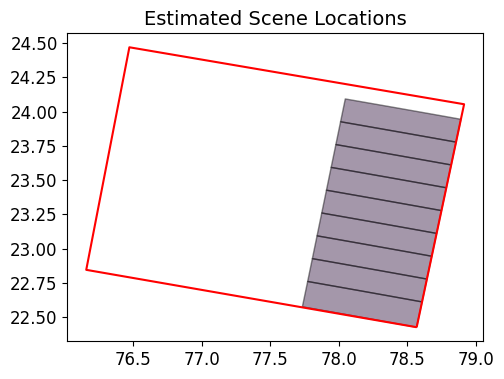

In [ ]:
sbas.plot_scenes(AOI=AOI, aspect='equal')

# Reframe Scenes (Optional)**bold text**

In [ ]:
sbas.compute_reframe(AOI)

In [ ]:
import logging

# Add logging to the _reframe_subswath function
def _reframe_subswath(self, subswath, date, geometry):
    logging.info(f"Reframing subswath: {subswath}, date: {date}, geometry: {geometry}")
    # ... existing code ...

# Update the compute_reframe method to enable logging
class Stack(S1.Stack):
    def compute_reframe(self, geometry, n_jobs, **kwargs):
        logging.basicConfig(level=logging.INFO)
        # ... existing code ...

# Create Stack object
sbas = Stack(WORKDIR, drop_if_exists=True).set_scenes(scanned_scenes)

# Compute reframe with logging enabled
sbas.compute_reframe(AOI, n_jobs=2)

In [ ]:
sbas.compute_reframe(AOI)

# Load **DEM**

In [ ]:
# download Copernicus Global DEM 1 arc-second
Tiles().download_dem(AOI, filename=DEM)

In [ ]:
import os

# Get the current working directory
cwd = os.getcwd()

# List the contents of the current directory
contents = os.listdir(cwd)

# Check if the DEM file is present
if DEM in contents:
    print("DEM file found in the current directory.")
else:
    print("DEM file not found in the current directory.")


In [ ]:
import dask.array as da
import rasterio

# Define the filename of the DEM
DEM = "copernicus_dem.tif"

# Load the DEM using Dask
with rasterio.open(DEM) as src:
    # Read the DEM as a Dask array
    dem_dataarray = da.from_array(src.read(1), chunks=(2048, 2048))

# Verify the Dask array
print(dem_dataarray)

# Now you can pass dem_dataarray to the sbas.load_dem() method


In [ ]:
import os

# List all files in the current directory
files = os.listdir()

# Search for the DEM file
dem_files = [file for file in files if "copernicus_dem.tif" in file]

if dem_files:
    print("DEM file found in the current directory.")
    print("Path:", dem_files[0])
else:
    print("DEM file not found.")



In [ ]:
# define the area of interest (AOI) to speedup the processing
sbas.load_dem(DEM, AOI)

In [ ]:
sbas.load_dem(os.path.join(cwd, DEM), AOI)


In [ ]:
if os.path.exists('/.dockerenv') and not 'google.colab' in sys.modules:
    # use special joblib backend in Docker containers
    sbas.compute_align(joblib_aligning_backend='threading')
else:
    sbas.compute_align()